# Regresión lineal: implementación en Keras

## 1. Configuración Google Drive

In [1]:
ruta = r'C:\Users\yordy\OneDrive\Escritorio\Internet Explorer\deep\learn\assets\datasets\prices.csv'

## 2. Lectura y visualización del set de datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
np.random.seed(25)
tf.random.set_seed(25)

C:\Users\yordy\AppData\Local\Temp\ipykernel_2188\39420291.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
data = pd.read_csv(ruta)

In [6]:
data.head()

,Area,Precio
0,152.272727,65928.86015
1,102.272727,44477.41849
2,222.727273,95848.62198
3,79.545455,44964.89827
4,86.363636,34367.39122


In [7]:
data.shape

(100, 2)

In [8]:
x = data['Area'].values
y = data['Precio'].values

Text(0, 0.5, 'y (precio (en U$)')

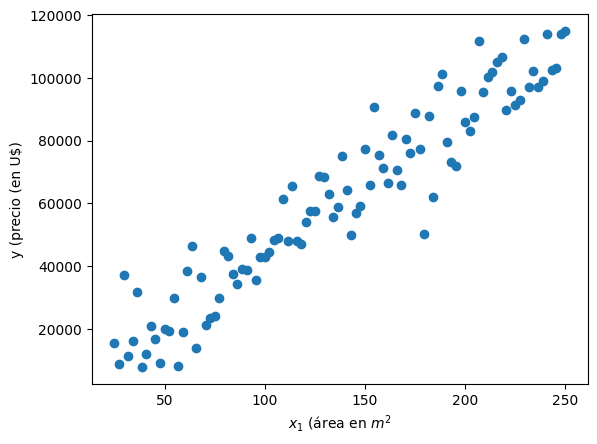

In [9]:
plt.scatter(x,y)
plt.xlabel('$x_1$ (área en $m^2$')
plt.ylabel('y (precio (en U$)')

## 3. Construir el modelo lineal en Keras

In [10]:
# Contenedor vacío
modelo = Sequential()

In [11]:
# Comenzar a llenar el modelo ('add')
modelo.add(Dense(1, activation='linear', input_shape=((1,))))

In [12]:
# Información del modelo y = wx + b
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 4. Optimizador (Gradiente Descendente Estocástico) y pérdida

In [13]:
lr = 0.00001
optimizador = SGD(learning_rate=lr)
modelo.compile(optimizer=optimizador, loss='mse')

## 5. Entrenamiento y predicción

In [14]:
n_epochs = 20
s_minibatches = 10 # Probar con diferentes batch_sizes
historia = modelo.fit(x,y,epochs=n_epochs,batch_size=s_minibatches,verbose=1)

Epoch 1/20
10/10 [==============================] - 2s 4ms/step - loss: 793386496.0000
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 88015688.0000
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 90311944.0000
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 90005800.0000
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 87927200.0000
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 92732128.0000
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 88902224.0000
Epoch 8/20
10/10 [==============================] - 0s 1ms/step - loss: 88999984.0000
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 88838632.0000
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 90567272.0000
Epoch 11/20
10/10 [==============================] - 0s 3ms/step - loss: 88884088.0000
Epoch 12/20
10/10 [==============================] 

### 5.1 Comportamiento del error

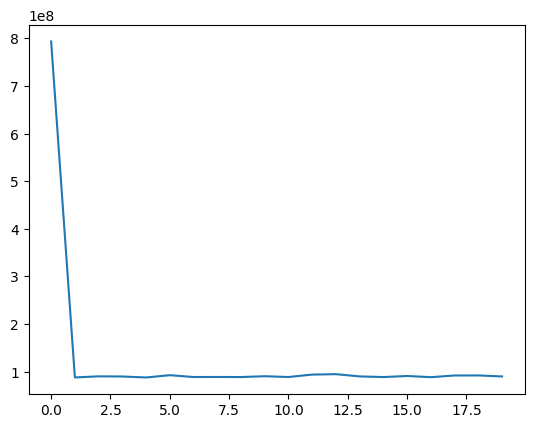

In [15]:
plt.plot(historia.history['loss'])

### 5.2 Predicción

4/4 [==============================] - 0s 3ms/step


Text(0, 0.5, 'y (precio (en U$)')

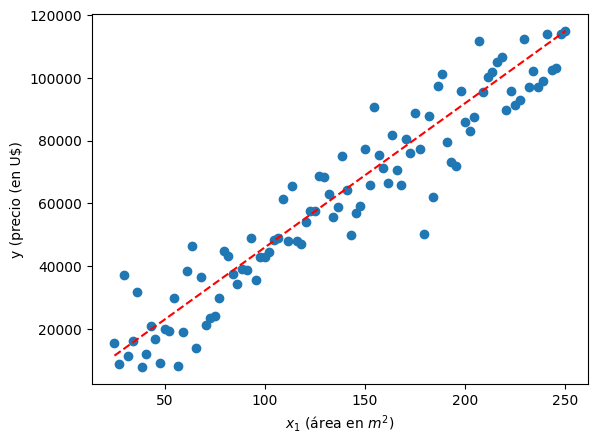

In [16]:
# Dibujar recta resultante
x_pred = np.linspace(x.min(),x.max(),x.shape[0])
y_pred = modelo.predict(x_pred)

plt.scatter(x,y)
plt.plot(x_pred,y_pred,'r--')
plt.xlabel('$x_1$ (área en $m^2$)')
plt.ylabel('y (precio (en U$)')